### Source : http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/AV/present"

In [3]:
waves = np.load(path + "/present_AV_waves_10sec.npy", allow_pickle= True)

In [4]:
n = waves.shape[0]

In [5]:
import librosa as lbs

In [6]:
lbs.feature.mfcc(y=waves[0], sr=4000, win_length = 100, n_mfcc=13).shape

(13, 79)

In [7]:
lbs.feature.mfcc(y=waves[0], sr=4000, win_length = 100, n_mfcc=13)[0].mean()

-633.10925

In [8]:
mfccs = lbs.feature.mfcc(y=waves[0], sr=4000, win_length = 100, n_mfcc=13)

In [9]:
import librosa.display

[Text(0.5, 1.0, 'MFCC')]

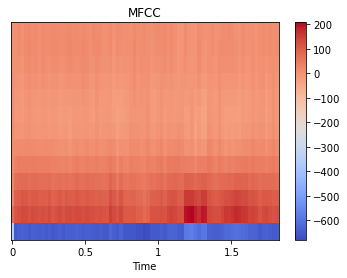

In [10]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots(nrows=1, sharex=True)
>>> img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
>>> fig.colorbar(img, ax=[ax])
>>> ax.set(title='MFCC')

In [11]:
mfccs = np.empty((n, 13))
for i in range(waves.shape[0]):
    mfcc = lbs.feature.mfcc(y=waves[i], sr=4000, win_length = 100, n_mfcc=13)
    for j in range(13):
        mfccs[i, j] = mfcc[j].mean()
    

In [12]:
mfccs.shape

(1245, 13)

In [13]:
import pandas as pd

In [14]:
columns = []
for i in range(13):
    columns.append("{}'th mfcc".format(i))

In [15]:
mfccs_df = pd.DataFrame(mfccs, columns = columns)

In [16]:
mfccs_df

,0'th mfcc,1'th mfcc,2'th mfcc,3'th mfcc,4'th mfcc,5'th mfcc,6'th mfcc,7'th mfcc,8'th mfcc,9'th mfcc,10'th mfcc,11'th mfcc,12'th mfcc
0,-633.109253,132.700790,107.842934,74.306953,39.785713,11.594851,-5.850253,-11.787212,-8.720296,-1.054230,6.603188,10.925388,10.672085
1,-701.071594,155.947449,125.058556,83.826912,42.478271,10.240438,-7.892224,-12.005322,-6.336492,2.968461,10.324830,12.509784,9.245497
2,-741.243896,144.392624,117.971466,81.752098,44.652954,14.680330,-3.411008,-9.114907,-5.614161,1.940580,8.533819,10.958953,8.535465
3,-732.736938,151.063507,122.540520,84.347046,45.718349,15.088373,-2.875393,-8.049913,-4.078320,3.585862,9.855361,11.641628,8.457591
4,-735.887756,159.142487,127.244217,85.238556,43.997086,12.814139,-3.882348,-7.016807,-1.437791,6.647314,12.122697,12.467425,7.965951
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,-588.792297,113.684715,93.878868,67.051743,38.859001,15.127267,-0.260531,-6.127991,-3.993232,2.810654,10.430388,15.764427,17.263075
1241,-605.685547,121.834923,100.678566,72.031822,42.340965,17.545874,1.642311,-4.437300,-2.462748,4.086339,11.290581,16.108189,17.092247
1242,-597.122437,118.523613,98.212830,70.891685,42.662952,18.916773,3.500680,-2.521864,-0.913229,4.965795,11.423759,15.550457,16.047947
1243,-576.533752,113.801575,94.040977,67.431458,39.770035,16.870235,2.424724,-2.699684,-0.320392,6.073212,12.686643,16.670540,16.820971


In [18]:
mfccs_df.to_csv("/Users/ecem/Desktop/phonocardiogram/data/AV/present/AV-mfcc.csv")